# Introduction

The dataset of this experiment includes user posts on social media, recording the user's text content, emotional tendencies, posting time, user ID, social platform, related tags, reposts, likes, country, as well as specific information such as year, month, day, and hour. The dataset covers users from multiple countries around the world, involving social platforms such as Twitter, Instagram, and Facebook. Emotional tags include various emotional states such as positive, negative, and neutral. These data provide us with rich materials for analyzing user emotional expression.
The prediction task of this experiment is to explore the impact of different factors (such as time, location, platform) on user emotional expression. We aim to predict the distribution of user emotions under specific conditions through statistical analysis and machine learning methods. For example, we may predict the probability of a user posting positive emotional posts on a specific social platform during a certain period of time. In addition, we will also explore the differences in emotional expression among users in different countries, as well as the possible cultural and social factors behind these differences.
Through analysis of the dataset, we found that posts with positive emotions accounted for a higher proportion, indicating that social media users tend to share positive emotions and experiences. There are significant differences in the distribution of emotions on different social platforms, with a relatively high proportion of negative emotional posts on Twitter, which may be related to the real-time and news nature of the platform. Time factor analysis shows that during weekends and holidays, users express positive emotions more frequently, which may be related to an increase in leisure time and frequent social activities. Regional analysis reveals differences in emotional expression among users from different countries, which may be related to differences in cultural backgrounds and social environments in different regions. These findings are of great significance for understanding the emotional dynamics of global social media users and provide valuable references for content recommendation and sentiment analysis on social platforms.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading vader_lexicon: <urlopen error TLS/SSL
[nltk_data]     connection has been closed (EOF) (_ssl.c:1129)>
[nltk_data] Error loading punkt: <urlopen error TLS/SSL connection has
[nltk_data]     been closed (EOF) (_ssl.c:1129)>
[nltk_data] Error loading stopwords: <urlopen error TLS/SSL connection
[nltk_data]     has been closed (EOF) (_ssl.c:1129)>


In [ ]:
df = pd.read_csv("sentimentdataset.csv")

# Data Description

The data for this experiment is sourced from the Kaggle official website. The CSV file with the data name "sentiment dataset. csv" contains post data collected from social media platforms, covering public posts from different users, including text content, emotional tendencies, timestamps, and other information.
Data Description:
1. Text content: The original text posted by users on social media, reflecting their views, emotions, and experiences.
2. Sentiment: The emotional tendency of a post, marked as "Positive", "Negative", "Neutral", and other categories.
3. Timestamp: The specific date and time when the post was published, in the format of "YYYY-MM-DD HH: MM: SS".
4. User: The social media user ID or nickname who posted the post.
5. Platform: A social media platform for posting, such as Twitter, Instagram, Facebook, etc.
6. Hashtags: tags or topics included in a post, used for classification and searching.
7. Retweeks: The number of times a post has been forwarded by other users.
8. Likes: The number of likes received by a post.
9. Country: The country or region where the user is located.
10. Year, Month, Day, Hour: The time information of the post publication, which records the year, month, day, and hour respectively.
This dataset provides researchers with a comprehensive perspective to analyze and understand the emotional expressions of social media users and their influencing factors. Through in-depth analysis of these data, the impact of different cultures, times, and social environments on user emotions can be revealed, providing support for social media analysis, sentiment analysis research, and marketing strategies.


In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
'''
For calculating and displaying the number and percentage of missing values (NaN) in each column of a DataFrame and presenting this information with a gradient background color.
'''
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,Unnamed: 0.1,int64,0,0.000000
1,Unnamed: 0,int64,0,0.000000
2,Text,object,0,0.000000
3,Sentiment,object,0,0.000000
4,Timestamp,object,0,0.000000
5,User,object,0,0.000000
6,Platform,object,0,0.000000
7,Hashtags,object,0,0.000000
8,Retweets,float64,0,0.000000
9,Likes,float64,0,0.000000


In [ ]:
df.duplicated().sum() #Check for duplicate rows

0

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [ ]:
'''
Calculate the number of unique values in each column and then print this information.

'''
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0.1: 732 distinct values
Unnamed: 0: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


Data Preprocessing

In [ ]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Hashtags','Day', 'Hour','Sentiment']) #Remove unnecessary columns

In [ ]:
df['Platform'].value_counts() #Proportion of social media platforms

Platform
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64

In [ ]:
df['Platform'] = df['Platform'].str.strip()

In [ ]:
df['Country'].value_counts()  #Proportion of countries

Country
USA             59
USA             55
UK              49
Canada          44
Australia       41
                ..
China            1
Cambodia         1
Switzerland      1
Norway           1
Colombia         1
Name: count, Length: 115, dtype: int64

In [ ]:
df['Country'] = df['Country'].str.strip()

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp']) #Convert to datetime format

df['Day_of_Week'] = df['Timestamp'].dt.day_name()

In [ ]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df['Month'] = df['Month'].map(month_mapping)

df['Month'] = df['Month'].astype('object')

文本处理

In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
#Remove stop words
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = " ".join(text.split())
    tokens = word_tokenize(text)

    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]

    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

df["Clean_Text"] = df["Text"].apply(clean)

In [ ]:
specified_columns = ['Platform','Country', 'Year','Month','Day_of_Week']
'''
Iterate through the specified columns and print the total number of unique values in each column along with the frequency of each unique value.

'''
for col in specified_columns:
    total_unique_values = df[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n')

Total unique values for Platform: 3
Instagram: 258
Twitter: 243
Facebook: 231


Total unique values for Country: 115
 USA: 59
 USA : 55
 UK: 49
 Canada: 44
 Australia : 41
 Canada : 34
 UK : 33
 India : 21
 USA          : 20
 Canada        : 17
 UK            : 13
 Australia    : 12
 USA      : 12
 Brazil : 11
 India         : 11
 USA       : 10
 France : 10
 India    : 10
 Japan : 10
 Canada    : 10
 UK           : 9
 USA               : 9
USA: 9
 Germany : 9
 Italy : 8
 India     : 8
 UK       : 8
 UK                : 7
 Canada   : 7
 Canada            : 6
 Canada     : 6
 Australia          : 6
 UK        : 6
 India             : 5
 Australia     : 5
 India        : 5
 Australia   : 5
 UK         : 5
 India      : 5
 USA        : 4
 USA             : 4
 UK          : 4
 UK   : 4
 South Africa : 4
 Canada          : 3
 Germany         : 3
 Spain : 3
 Canada      : 3
 Brazil          : 2
 India          : 2
 Italy           : 2
 Czech Republic  : 2
 Denmark         : 2
 Greece : 2
 Be

# Models and Methods


This experiment utilized data visualization methods and machine learning classification models. Machine learning classification models include Logistic Regression RandomForestClassifier、SVC。

In [ ]:
df1 = df.copy()

Sentiment Analysis

In [ ]:
analyzer = SentimentIntensityAnalyzer()

df1['Vader_Score'] = df1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df1[['Clean_Text', 'Vader_Score', 'Sentiment']].head())

                     Clean_Text  Vader_Score Sentiment
0         enjoy beauti day park       0.4939  positive
1          traffic terribl morn       0.0000   neutral
2           finish amaz workout       0.0000   neutral
3   excit upcom weekend getaway       0.0000   neutral
4  tri new recip dinner tonight       0.0000   neutral


Firstly, remove invalid information such as stop words in the comments, and use SentimentSentityAnalyzer to perform sentiment analysis on each user comment, determining whether the statement belongs to positive, negative, or neutral categories. The results are as follows:

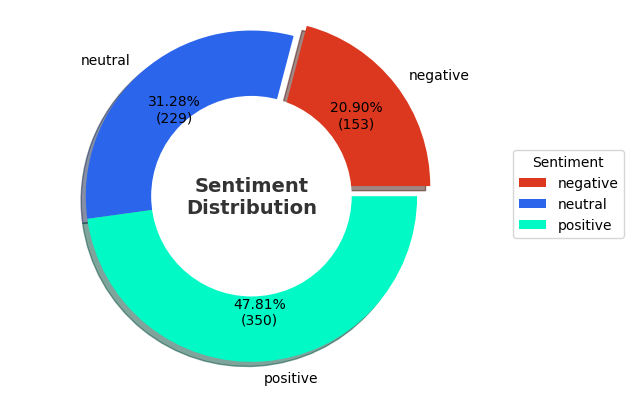

In [ ]:
colors = ['#DC381F', '#2B65EC', '#01F9C6']

explode = (0.1, 0, 0)

sentiment_counts = df1.groupby("Sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.show()

This graph is used to display statistical data on emotional distribution. The figure is divided into three parts, representing negative, neutral, and positive emotions respectively. According to the data in the figure, positive emotions account for the largest proportion, at 47.81%, with a total of 350 samples; Next is neutral emotion, accounting for 31.28% with 229 samples; The proportion of negative emotions is the smallest, accounting for 20.90%, with 153 samples. This distribution indicates that in the analyzed dataset, the expression of positive emotions is significantly higher than that of negative and neutral emotions, which may mean that users are more inclined to share positive experiences and emotions on social media. In addition, the graph clearly displays the relative frequencies of various emotions through different colors and percentages, providing an intuitive visual tool for understanding emotional tendencies on social media.

Year

Next, further analyze the changes in the data of the three emotional categories each year and draw a bar chart for analysis.

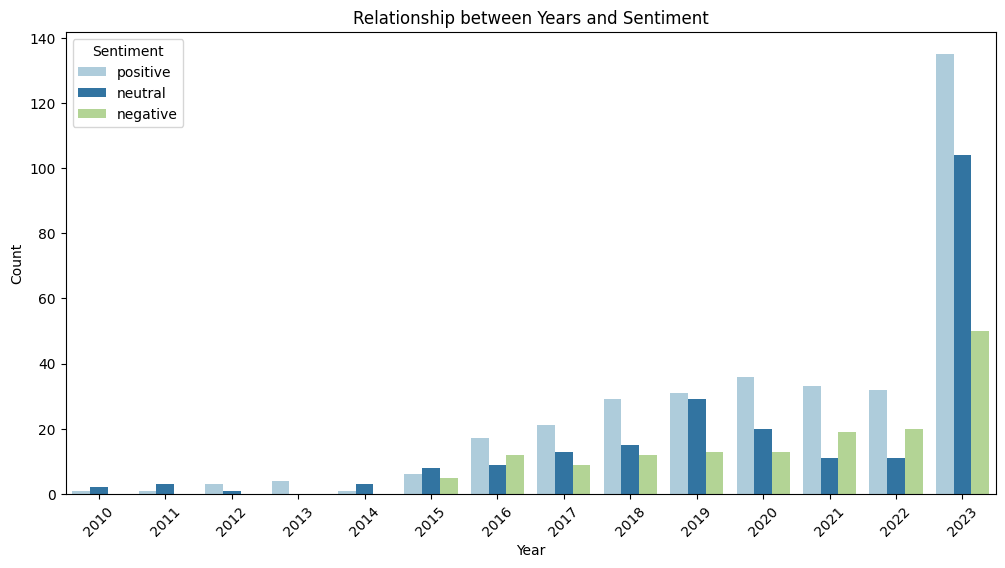

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The results show the distribution of positive, neutral, and negative emotions in different years from 2010 to 2023. The vertical axis of the chart represents the number of emotional posts, while the horizontal axis represents the year. It can be observed that the number of posts with positive emotions dominated in all years, especially in 2022 and 2023, with a significant increase and reaching its peak in 2023. The number of posts with neutral emotions is relatively stable, without significant fluctuations, while the number of posts with negative emotions is relatively small, but also shows a trend of increasing year by year.
Since 2015, the number of posts with various emotions has started to increase, which may be related to the popularity of social media and the growth of user base. From 2018 to 2020, the number of posts on various emotions remained relatively stable, but starting from 2021, the number of posts on positive emotions began to significantly increase, which may be related to global events, changes in social media algorithms, or shifts in user behavior patterns.


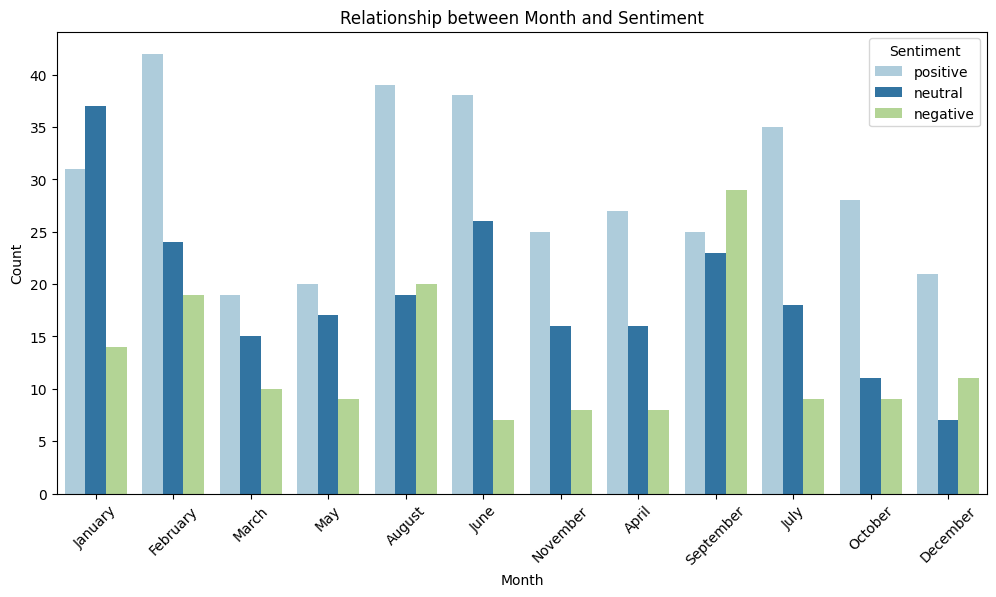

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Day of Week

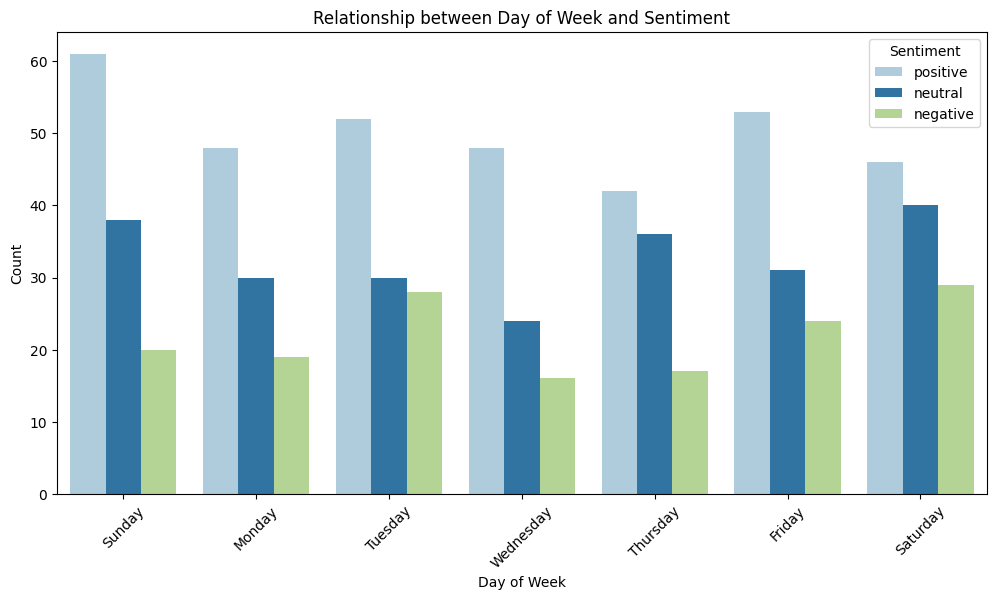

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Platform
Analyze the proportion of emotion categories on different social platforms:

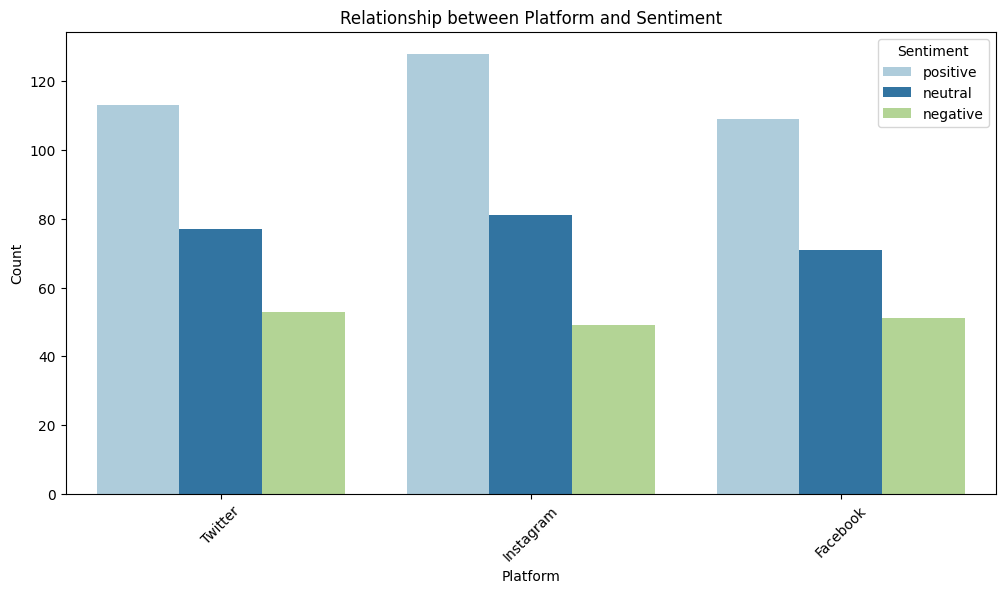

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

he result table shows the distribution of users' emotional tendencies on different social media platforms (Twitter, Instagram, Facebook). In the chart, positive emotions are represented in light blue, neutral emotions are represented in dark blue, and negative emotions are represented in light green. From the graph, it can be seen that all three platforms have the highest number of positive emotional posts, especially Instagram, which has the highest number of positive emotional posts, close to 130. The number of positive emotional posts on Twitter and Facebook is similar, but slightly lower than on Instagram. Neutral sentiment posts are evenly distributed across the three platforms, with Facebook slightly more than Twitter and Instagram in terms of quantity. The number of posts with negative emotions is the lowest on all platforms, and the difference in quantity among the three platforms is not significant. This emotional distribution may reflect users' behavior habits and preferences on different social media platforms, for example, Instagram may be more inclined to share positive moments of life, while Twitter may be more used for daily communication and information sharing. Overall, users tend to express and spread positive content on social media.

Country

Next, analyze the sentiment categories of users in different countries:

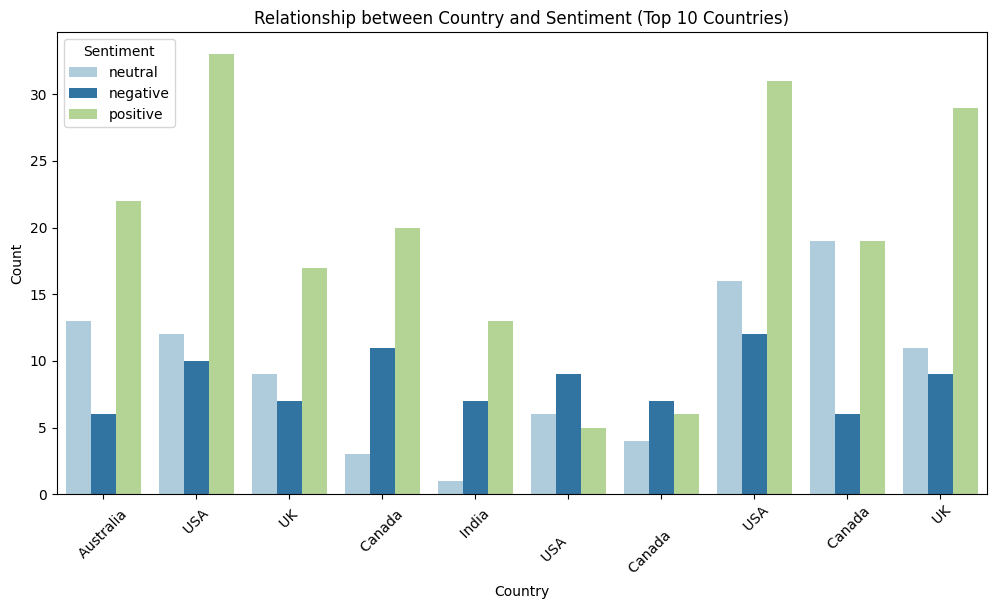

In [ ]:
plt.figure(figsize=(12, 6))

top_10_countries = df1['Country'].value_counts().head(10).index

df_top_10_countries = df1[df1['Country'].isin(top_10_countries)]

sns.countplot(x='Country', hue='Sentiment', data=df_top_10_countries, palette='Paired')
plt.title('Relationship between Country and Sentiment (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

 In the chart, positive emotions are represented in light green, neutral emotions are represented in light blue, and negative emotions are represented in dark blue. From the graph, it can be seen that there are significant differences in emotional expression among different countries.
The United States (USA) has the highest number of positive emotional expressions, exceeding 30, indicating a relatively positive emotional tendency. Following closely behind is India, with a relatively high number of posts expressing positive emotions. Australia and Canada have similar numbers of positive emotional expressions, both around 20, showing a relatively optimistic social media atmosphere.
The UK has a higher number of neutral emotions expressed, slightly higher than positive emotions, which may reflect users' tendency towards more neutral or conservative expression. Canada also has a relatively large number of neutral emotional posts, but positive emotional expressions still dominate.
It is worth noting that although the majority of posts express positive emotions in all countries, the expression of negative emotions is reflected in all countries. Among them, India has a relatively large number of posts expressing negative emotions, which may be related to the country's socio-economic situation, population pressure, and other factors.
Overall, this chart reveals the emotional tendencies of different countries on social media, with positive emotions generally dominating, but the distribution of neutral and negative emotions also provides an important perspective for us to understand the emotional dynamics of social media users in various countries. These pieces of information are of significant value in fields such as social media strategy, international market analysis, and cross-cultural communication research.


MOST COMMON WORD

In [ ]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,new,43
1,life,37
2,challeng,34
3,joy,31
4,danc,30
5,day,29
6,feel,29
7,like,28
8,dream,28
9,moment,27


In [ ]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

fig = px.bar(top_words_df,
            x="count",
            y="Common_words",
            title='Common Words in Text Data',
            orientation='h',
            width=700,
            height=700,
            color='Common_words')

fig.show()

Positive Word

In [ ]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')

,Common_words,count
0,joy,30
1,friend,24
2,laughter,24
3,new,21
4,challeng,20
5,life,20
6,hope,20
7,dream,20
8,embrac,19
9,like,19


Draw a word cloud map for the comment text as follows:

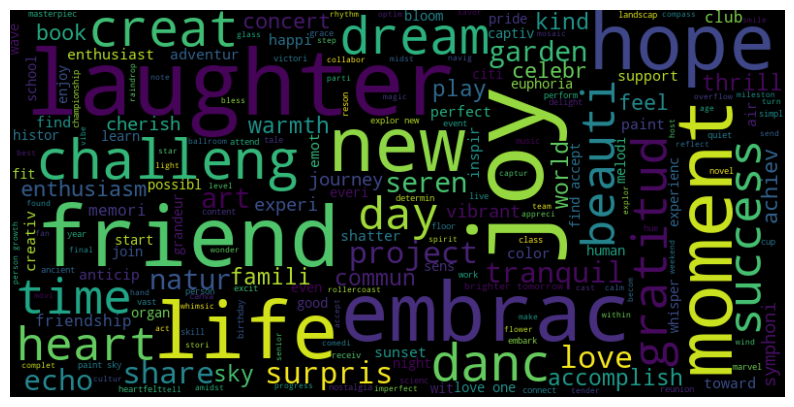

In [ ]:
#Create a word cloud
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

 Neutral Word

In [ ]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,new,22
1,explor,13
2,excit,12
3,life,12
4,beauti,12
5,night,12
6,danc,12
7,attend,11
8,seren,11
9,feel,10


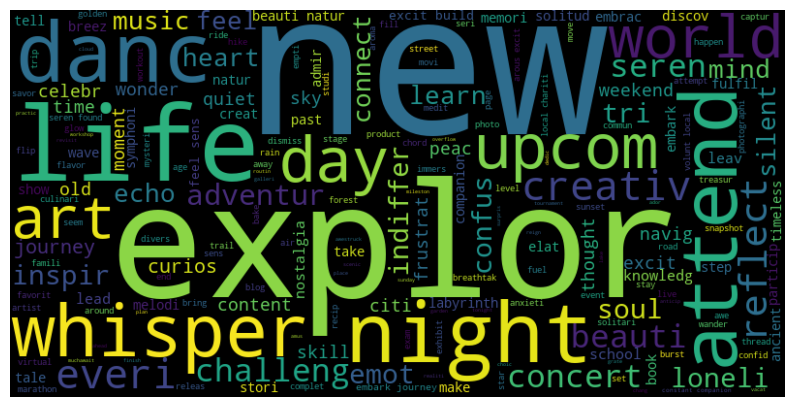

In [ ]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

 Negative Word

In [ ]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Reds')

,Common_words,count
0,despair,14
1,lost,14
2,emot,13
3,feel,11
4,bitter,10
5,storm,10
6,day,9
7,like,9
8,grief,8
9,heart,8


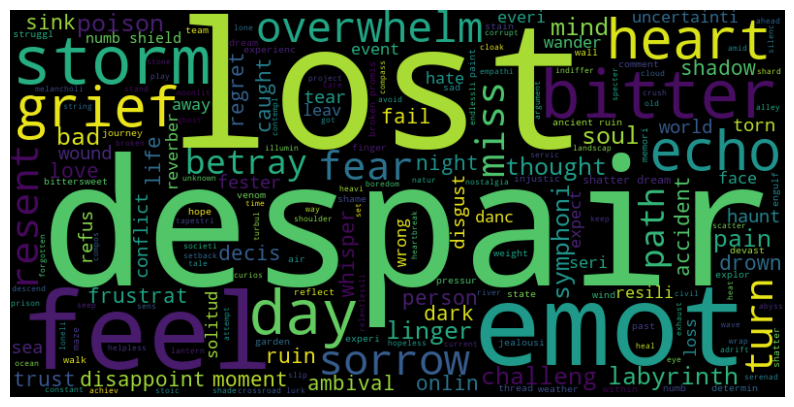

In [ ]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the graph, it can be seen that words such as life, new, friend, and joy are the most common.
Next, the data will be divided into training and testing sets for model building. Treat data text as features and data sentiment categories as labels. Build Logistic Regression, RandomForestClassifier, and SVC models separately for training and analysis.
Firstly, TF-IDF is used to process the raw text data. In machine learning and natural language processing (NLP) tasks, TF-IDF (Term Frequency Across Document Frequency) is a commonly used text feature extraction method. It can convert textual data into numerical features, making it easier for machine learning models to process.
Firstly, a 'TfidfVectorizer' object was created, which is a class in the 'sklearn. feature.exe. text' module specifically designed to convert text data into TF-IDF representations` The max_features=5000 parameter specifies the maximum number of features (i.e. words) in the TF-IDF vector, which means that the vectorizer will consider the 5000 words with the highest TF-IDF values in the text. Then two operations were performed: first, 'fit', which learns the vocabulary and TF-IDF values for each word based on the training set 'X_train' (which contains the text content of the training data); Next is' transform ', which converts the training data into TF-IDF vectors.
Then, a transformation operation was performed on the test set 'X_test', using the vocabulary and TF-IDF values already learned from the training set to transform the text data of the test set. Note that 'fit' is not used here because the vocabulary has already been defined on the training set, which ensures that the same feature space is used for training and testing.
Train the processed data separately into Logistic Regression, Random Forest Classifier, and SVC models, and then test the trained models using test data.


DATA PREPARATION

# Results and Interpretation:

In [ ]:
df2 = df1.copy()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

Data Splitting

In [ ]:
X = df2['Clean_Text'].values
y = df2['Sentiment'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

Build Model (Machine Learning)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Logistic Regression

The results of the Logistic Regression model are as follows:

In [ ]:
logistic_classifier = LogisticRegression(max_iter=50, random_state=42)
logistic_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=50, random_state=42)

In [ ]:
y_pred_logistic = logistic_classifier.predict(X_test_tfidf)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

Classification Report (Logistic Regression)

In [ ]:
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:\n", classification_rep_logistic)

Logistic Regression Results:
Accuracy: 0.7755102040816326
Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.57      0.67        23
     neutral       0.71      0.60      0.65        40
    positive       0.79      0.92      0.85        84

    accuracy                           0.78       147
   macro avg       0.77      0.69      0.72       147
weighted avg       0.77      0.78      0.77       147



The overall accuracy of the model is 0.7755, which means approximately 77.55% of the predictions are correct. This result indicates that the model is able to make accurate sentiment classification in most cases.
The classification report provides more detailed performance metrics, including precision, recall, F1 score, and support.
1. Negative emotion: The model has an accuracy of 0.81 in identifying negative emotions, a recall rate of 0.57, and an F1 score of 0.67. This indicates that the model is able to identify posts with negative emotions with an accuracy of 81%, but the recall rate is relatively low, meaning that a considerable portion of negative emotion posts were not correctly identified.
2. Neutral sentiment: For neutral sentiment, the model has an accuracy of 0.71, a recall of 0.60, and an F1 score of 0.65. This shows that the model performs poorly in identifying neutral sentiment posts, with some margin of error.
3. Positive sentiment: The model performs the best on positive sentiment, with an accuracy of 0.79, a recall rate of up to 0.92, and an F1 score of 0.85. This indicates that the model can accurately identify posts with positive emotions in most cases.
Macro AVG provides a simple average performance metric that does not consider the number of samples in each category. Its accuracy, recall, and F1 score are 0.77, 0.69, and 0.72, respectively. Weighted average (avg) takes into account the sample size of each category, providing a more comprehensive model performance metric with accuracy, recall, and F1 score of 0.77.


Random Forest

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=30,random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

In [ ]:
y_pred_rf = random_forest_classifier.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

Classification Report Random Forest

In [ ]:
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", classification_rep_rf)


Random Forest Results:
Accuracy: 0.782312925170068
Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.70      0.78        23
     neutral       0.66      0.72      0.69        40
    positive       0.82      0.83      0.83        84

    accuracy                           0.78       147
   macro avg       0.79      0.75      0.77       147
weighted avg       0.79      0.78      0.78       147



The performance of the random forest model in sentiment analysis tasks is slightly better than the previous logistic regression model. The overall accuracy of the model is 0.7823, or 78.23%, indicating a high level of accuracy in predicting emotional categories. The classification report shows that the model performs the best in identifying negative emotions, with an accuracy of 0.89, a recall rate of 0.70, and an F1 score of 0.78. This indicates that the model can identify posts with negative emotions with high accuracy and make reliable predictions about negative emotions. In the recognition of neutral emotions, the accuracy of the model is 0.66, the recall rate is 0.72, and the F1 score is 0.69, indicating that the model has some error in predicting neutral emotions, but can still recognize neutral emotions well. In terms of positive emotion recognition, the accuracy of the model is 0.82, the recall rate is 0.83, and the F1 score is 0.83, indicating that the model performs well in positive emotion recognition and can accurately identify most positive emotion posts. The accuracy, recall, and F1 score of macro avg and weighted avg are 0.79, 0.75, and 0.77, respectively. The random forest model provides a relatively reliable prediction in sentiment analysis tasks, especially in the recognition of negative and positive emotions.

Support Vector Machine (SVM)

In [ ]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

SVC(random_state=42)

In [ ]:
y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

Classification Report SVM

In [ ]:
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm)

Support Vector Machine Results:
Accuracy: 0.7006802721088435
Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.39      0.53        23
     neutral       0.70      0.40      0.51        40
    positive       0.69      0.93      0.79        84

    accuracy                           0.70       147
   macro avg       0.73      0.57      0.61       147
weighted avg       0.71      0.70      0.67       147



The performance of support vector machine (SVM) models in sentiment analysis tasks shows different strengths and weaknesses. The overall accuracy of the model is 0.7007, which is 70.07%, slightly lower than the aforementioned random forest model. In the recognition of negative emotions, the SVM model has a high accuracy of 0.82, but a low recall rate of only 0.39. This indicates that the model can accurately identify posts with negative emotions, but at the same time, it misses a considerable number of posts with negative emotions. In terms of neutral emotion recognition, the accuracy of the model is 0.70, the recall rate is 0.40, and the F1 score is 0.51, indicating that there is a certain degree of error in neutral emotion prediction, and there are many neutral emotion posts that have not been correctly recognized. In terms of recognizing positive emotions, the model performs well with an accuracy of 0.69, a recall rate of up to 0.93, and an F1 score of 0.79, indicating that the model is reliable in recognizing positive emotions and can comprehensively identify posts with positive emotions. The accuracy, recall, and F1 score of macro average and weighted average are 0.73, 0.57, and 0.61, respectively, as well as 0.71, 0.70, and 0.67

best Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split


rf = RandomForestClassifier(random_state=42)

# GridSearchCV param
param_grid = {
    'n_estimators': [10, 50, 100,110,120,150,155],

    'max_depth': [None,1,2,5,10]

}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# print param score
cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results[['params', 'mean_test_score', 'std_test_score']])

# print best socre
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

test_accuracy = grid_search.score(X_test_tfidf, y_test)
print(f"Test set accuracy of the best estimator: {test_accuracy:.4f}")

Fitting 5 folds for each of 35 candidates, totalling 175 fits
                                      params  mean_test_score  std_test_score
0    {'max_depth': None, 'n_estimators': 10}         0.651282        0.033931
1    {'max_depth': None, 'n_estimators': 50}         0.654701        0.045420
2   {'max_depth': None, 'n_estimators': 100}         0.654701        0.031334
3   {'max_depth': None, 'n_estimators': 110}         0.654701        0.036100
4   {'max_depth': None, 'n_estimators': 120}         0.661538        0.023932
5   {'max_depth': None, 'n_estimators': 150}         0.659829        0.021891
6   {'max_depth': None, 'n_estimators': 155}         0.659829        0.023187
7       {'max_depth': 1, 'n_estimators': 10}         0.454701        0.003419
8       {'max_depth': 1, 'n_estimators': 50}         0.454701        0.003419
9      {'max_depth': 1, 'n_estimators': 100}         0.454701        0.003419
10     {'max_depth': 1, 'n_estimators': 110}         0.454701        0.003419
11

# Conclusion and Next Steps:

Summary: After comparing the performance of three different machine learning models for sentiment analysis tasks - logistic regression, random forest, and support vector machine - we can see that each model has its own advantages and areas for improvement. The logistic regression model provides a balanced performance, but has shortcomings in recalling negative emotions. The random forest model shows good performance in all categories, especially in the recognition of negative and positive emotions. Support vector machine performs best in recognizing positive emotions, but has significant shortcomings in recalling negative emotions.
Next task: In response to the shortcomings of the existing model, the next task should focus on optimizing the model and adjusting its parameters. For support vector machines, one can try adjusting the kernel function, penalty parameter C, or performing feature selection to improve the recall rate of negative emotions. At the same time, in order to further improve the generalization ability of the model, more feature engineering can be considered, such as using word embeddings to capture the semantic information of the text. In addition, ensemble learning methods such as random forest or gradient boosting can also be attempted to combine the advantages of multiple models and improve overall prediction performance. Finally, expanding and diversifying the training dataset is also a key step in improving model performance, especially by increasing the number of samples in categories where the model performs poorly. Through these methods, we can expect to achieve more accurate and robust sentiment analysis in future model iterations.
